In [2]:
import pandas as pd

In [28]:
import numpy as np

In [3]:
data = pd.read_csv('dataset.csv')
df = pd.DataFrame(data)

In [4]:
print(data.head())

  Table Code State Code District Code           Area Name Total/ Rural/ Urban  \
0      B0706        `33          `000  State - TAMIL NADU               Total   
1      B0706        `33          `000  State - TAMIL NADU               Total   
2      B0706        `33          `000  State - TAMIL NADU               Total   
3      B0706        `33          `000  State - TAMIL NADU               Total   
4      B0706        `33          `000  State - TAMIL NADU               Total   

  Age group  Worked for 3 months or more but less than 6 months -  Persons  \
0     Total                                            4218884               
1      `5-9                                              48238               
2    `10-14                                              76288               
3     15-19                                             257605               
4     20-24                                             478082               

   Worked for 3 months or more but less than

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 69 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   Table Code                                                                                                   1386 non-null   object
 1   State Code                                                                                                   1386 non-null   object
 2   District Code                                                                                                1386 non-null   object
 3   Area Name                                                                                                    1386 non-null   object
 4   Total/ Rural/ Urban                                               

In [7]:
missing_data = df.isnull().sum()
print(missing_data)

Table Code                                          0
State Code                                          0
District Code                                       0
Area Name                                           0
Total/ Rural/ Urban                                 0
                                                   ..
Industrial Category - R to U - HHI - Males          0
Industrial Category - R to U - HHI - Females        0
Industrial Category - R to U - Non HHI - Persons    0
Industrial Category - R to U - Non HHI - Males      0
Industrial Category - R to U - Non HHI - Females    0
Length: 69, dtype: int64


In [8]:
data = data.drop_duplicates()

In [24]:
import matplotlib.pyplot as plt

In [16]:
# Group the data by Age group and Industrial Category
grouped = df.groupby(['Age group'])

# Calculate the total number of persons, males, and females in each group
distribution = grouped[['Worked for 3 months or more but less than 6 months -  Persons',
                        'Worked for 3 months or more but less than 6 months - Males',
                        'Worked for 3 months or more but less than 6 months - Females']].sum()

# Reset the index to have a clean representation
distribution.reset_index(inplace=True)

# Calculate the total number of males and females for each group
distribution['Total Males'] = distribution['Worked for 3 months or more but less than 6 months - Males']
distribution['Total Females'] = distribution['Worked for 3 months or more but less than 6 months - Females']

# Optionally, you can calculate percentages by dividing by the total number of persons in each group
distribution['Percentage Males'] = (distribution['Total Males'] / distribution['Worked for 3 months or more but less than 6 months -  Persons']) * 100
distribution['Percentage Females'] = (distribution['Total Females'] / distribution['Worked for 3 months or more but less than 6 months -  Persons']) * 100

# Display the resulting distribution DataFrame
print(distribution)



         Age group  \
0            15-19   
1            20-24   
2            25-29   
3            30-34   
4            35-39   
5            40-49   
6            50-59   
7            60-69   
8            70-79   
9              80+   
10  Age not stated   
11           Total   
12          `10-14   
13            `5-9   

    Worked for 3 months or more but less than 6 months -  Persons  \
0                                             1030420               
1                                             1912328               
2                                             2219404               
3                                             1933824               
4                                             2011164               
5                                             3297084               
6                                             2156672               
7                                             1298724               
8                                              4

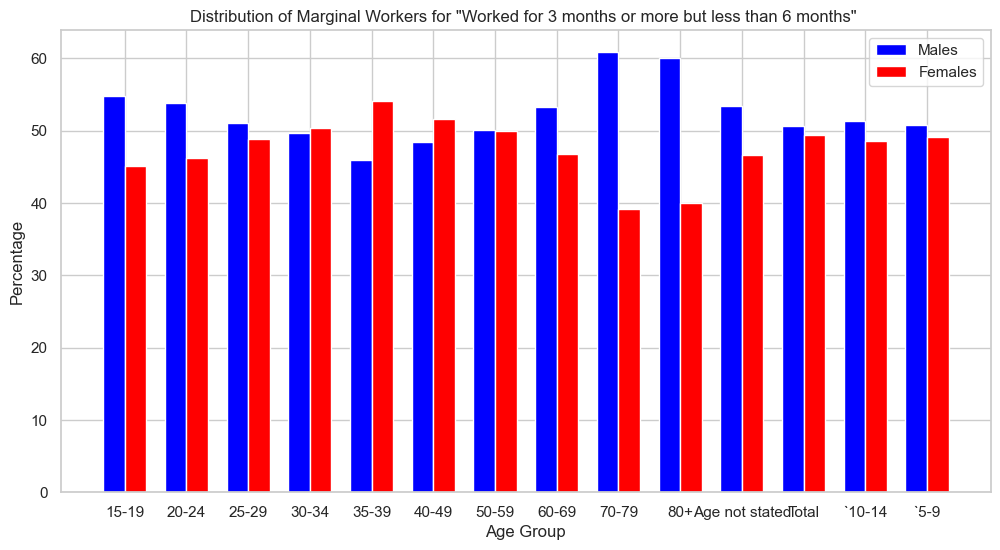

In [25]:

# Grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(distribution))

plt.bar(index, distribution['Percentage Males'], bar_width, label='Males', color='blue')
plt.bar([i + bar_width for i in index], distribution['Percentage Females'], bar_width, label='Females', color='red')

plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Distribution of Marginal Workers for "Worked for 3 months or more but less than 6 months" ')
plt.xticks([i + bar_width / 2 for i in index], distribution['Age group'])
plt.legend()

plt.show()


In [26]:
# Calculate the total number of persons, males, and females in each group for 'Worked for less than 3 months'
distribution = grouped[['Worked for less than 3 months - Persons',
                        'Worked for less than 3 months - Males',
                        'Worked for less than 3 months - Females']].sum()

# Reset the index to have a clean representation
distribution.reset_index(inplace=True)

# Calculate the total number of males and females for each group
distribution['Total Males'] = distribution['Worked for less than 3 months - Males']
distribution['Total Females'] = distribution['Worked for less than 3 months - Females']

# Optionally, you can calculate percentages by dividing by the total number of persons in each group
distribution['Percentage Males'] = (distribution['Total Males'] / distribution['Worked for less than 3 months - Persons']) * 100
distribution['Percentage Females'] = (distribution['Total Females'] / distribution['Worked for less than 3 months - Persons']) * 100

# Display the resulting distribution DataFrame
print(distribution)


         Age group  Worked for less than 3 months - Persons  \
0            15-19                                   167752   
1            20-24                                   324144   
2            25-29                                   366776   
3            30-34                                   317540   
4            35-39                                   336264   
5            40-49                                   551336   
6            50-59                                   387920   
7            60-69                                   282376   
8            70-79                                   100968   
9              80+                                    22380   
10  Age not stated                                     1932   
11           Total                                  2895564   
12          `10-14                                    27972   
13            `5-9                                     8204   

    Worked for less than 3 months - Males  \
0        

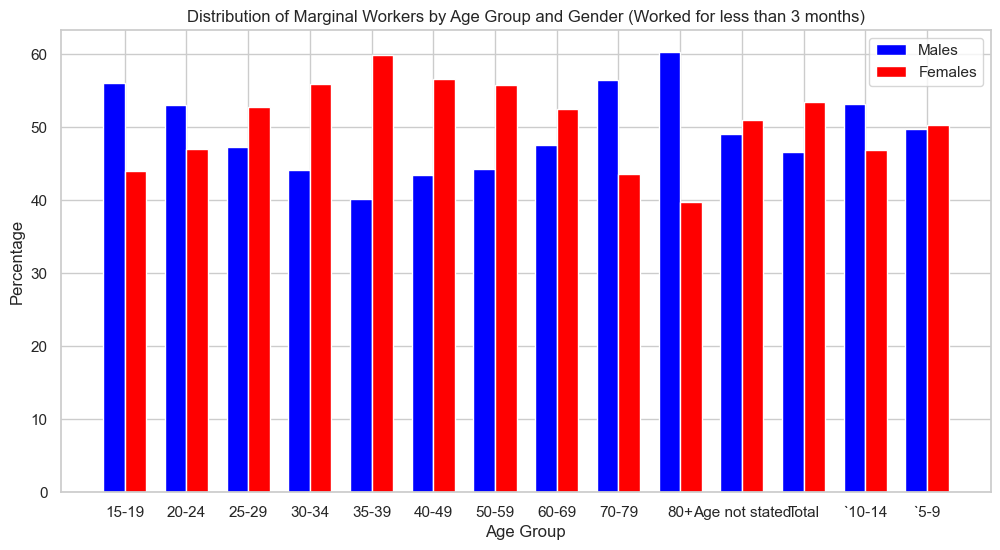

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

# Set the bar width and the number of bars
bar_width = 0.35
index = np.arange(len(distribution))

# Create bars for males
plt.bar(index, distribution['Percentage Males'], bar_width, label='Males', color='blue')

# Create bars for females
plt.bar(index + bar_width, distribution['Percentage Females'], bar_width, label='Females', color='red')

# Set x-axis labels and tick positions
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Distribution of Marginal Workers by Age Group and Gender (Worked for less than 3 months)')
plt.xticks(index + bar_width / 2, distribution['Age group'])

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [31]:
# Calculate the total number of persons, males, and females in each group for 'Industrial Category - A - Cultivators'
distribution = grouped[['Industrial Category - A - Cultivators - Persons',
                        'Industrial Category - A - Cultivators - Males',
                        'Industrial Category - A - Cultivators - Females']].sum()

# Reset the index to have a clean representation
distribution.reset_index(inplace=True)

# Calculate the total number of males and females for each group
distribution['Total Males'] = distribution['Industrial Category - A - Cultivators - Males']
distribution['Total Females'] = distribution['Industrial Category - A - Cultivators - Females']

# Optionally, you can calculate percentages by dividing by the total number of persons in each group
distribution['Percentage Males'] = (distribution['Total Males'] / distribution['Industrial Category - A - Cultivators - Persons']) * 100
distribution['Percentage Females'] = (distribution['Total Females'] / distribution['Industrial Category - A - Cultivators - Persons']) * 100

# Display the resulting distribution DataFrame
print(distribution)


         Age group  Industrial Category - A - Cultivators - Persons  \
0            15-19                                            71456   
1            20-24                                           134588   
2            25-29                                           175000   
3            30-34                                           165020   
4            35-39                                           176980   
5            40-49                                           324552   
6            50-59                                           247564   
7            60-69                                           166612   
8            70-79                                            60636   
9              80+                                            14888   
10  Age not stated                                             1292   
11           Total                                          1572328   
12          `10-14                                            20288   
13    

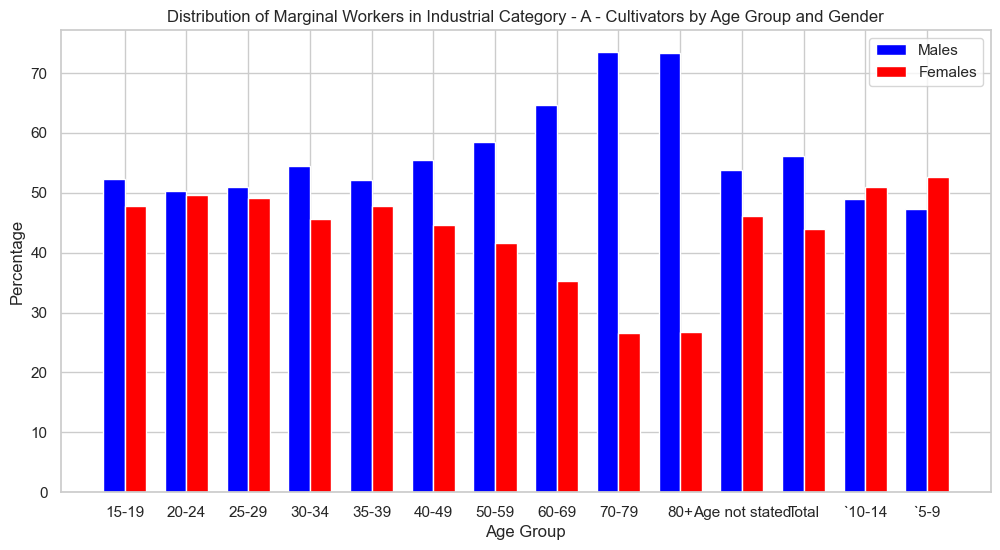

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

# Set the bar width
bar_width = 0.35
index = range(len(distribution))

# Create bars for males
plt.bar(index, distribution['Percentage Males'], bar_width, label='Males', color='blue')

# Create bars for females
plt.bar([i + bar_width for i in index], distribution['Percentage Females'], bar_width, label='Females', color='red')

# Set x-axis labels and tick positions
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Distribution of Marginal Workers in Industrial Category - A - Cultivators by Age Group and Gender')
plt.xticks([i + bar_width / 2 for i in index], distribution['Age group'])
plt.legend()

# Show the plot
plt.show()